## Evaluate the transcriptome integrated ssGEMs by grwoth rate prediction comparing with experimental growth data
- experimental data:
1. 96-well liquid culture in SC medium
2. Colony size in YPD medium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database')

In [50]:
# load predict data
pnasv3_pfba_result=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/newmethod_tissGEMs_pfba_flux.csv',index_col=0)
df_pred_growth=pnasv3_pfba_result.loc["growth",:]
# pnasv2_pfba_result=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/PNAS_v2_mean_ssGEMs_flux.xlsx',index_col=0)
# # remove .xml in index
# pnasv2_pfba_result.index=pnasv2_pfba_result.index.str.replace('.xml','')
# df_pred_growth=pnasv2_pfba_result.loc["growth",:]

In [51]:

# remove grwoth rate of 0
df_pred_growth=df_pred_growth[df_pred_growth!=0]

# remove .xml in df_pred_growth.index
df_pred_growth.index=df_pred_growth.index.str.replace('.xml','')

C:\Users\wangh\AppData\Local\Temp\ipykernel_20460\1799259204.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pred_growth.index=df_pred_growth.index.str.replace('.xml','')


d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


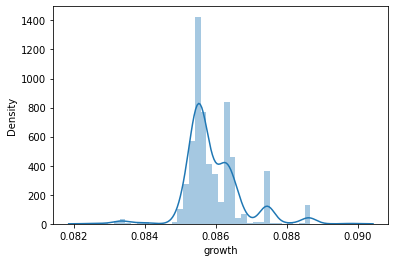

In [52]:
# check the growth rates distribution
sns.distplot(df_pred_growth)
plt.show()

In [3]:
#load experimental data
df_exp_data=pd.read_csv('data/transcriptomics/combined_969growth_data.csv',index_col=0)
# remove rows with genome_id is NaN
df_exp_data=df_exp_data[df_exp_data['genome_id'].notnull()]
#set genome_id as index
df_exp_data=df_exp_data.set_index('genome_id')
df_exp_data

,matrix,OD,t_mid_norm,col_OD_batch,Plate_number,YPD_colony_size
genome_id,,,,,,
ABS_6.re,M1-1 C01,0.144590,6.116814,1.0,1.0,772.97
ACG_7.re,M1-1 C09,0.137941,18.604549,1.0,1.0,866.62
ACV_2.re,M1-1 D10,0.143409,4.272838,1.0,1.0,967.06
ADF_4.re,M1-1 E04,0.119410,4.430291,1.0,1.0,745.31
ADN_4.re,M1-1 E09,0.132085,23.212373,1.0,1.0,995.19
...,...,...,...,...,...,...
CLV_5.re,M3-4 H02,0.781369,21.463097,4.0,10.0,1124.00
CMB_6.re,M3-4 H03,0.724392,17.930268,4.0,10.0,865.72
CMC_6.re,M3-4 H04,0.865303,18.149052,4.0,10.0,895.62


In [4]:
df_liquid_grwoth=df_exp_data['t_mid_norm']
df_colony_grwoth=df_exp_data['YPD_colony_size']
# remove nan values
df_liquid_grwoth=df_liquid_grwoth[df_liquid_grwoth.notnull()]
df_colony_grwoth=df_colony_grwoth[df_colony_grwoth.notnull()]

d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


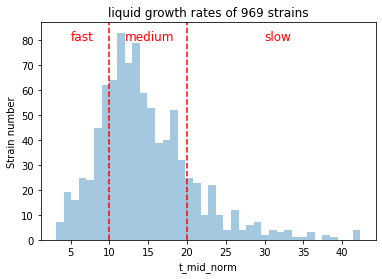

In [19]:
# plot the histogram of df_liquid_grwoth
sns.distplot(df_liquid_grwoth,bins=40,kde=False)
plt.title('liquid growth rates of 969 strains')
plt.xlabel('t_mid_norm')
plt.ylabel('Strain number')
# plot 2 lines x=10, x=20
plt.axvline(x=10, color='r', linestyle='--')
plt.axvline(x=20, color='r', linestyle='--')
# text fast , medium, slow , set color red
plt.text(5, 80, 'fast', color='red',fontsize=12)
plt.text(12, 80, 'medium', color='red',fontsize=12)
plt.text(30, 80, 'slow', color='red',fontsize=12)
plt.show()

In [20]:
# # divide strains into 3 groups according to their growth rates--t_mid_norm
# # 1. slow growth: t_mid_norm>20
# # 2. medium growth: 10<t_mid_norm<20
# # 3. fast growth: t_mid_norm<10
# slow_strainList=df_liquid_grwoth[df_liquid_grwoth>20].index.tolist()
# medium_strainList=df_liquid_grwoth[(df_liquid_grwoth>10)&(df_liquid_grwoth<20)].index.tolist()
# fast_strainList=df_liquid_grwoth[df_liquid_grwoth<10].index.tolist()

# df_strain_growth_type=pd.DataFrame(index=df_liquid_grwoth.index)
# df_strain_growth_type['growth_type']=None
# df_strain_growth_type.loc[fast_strainList,'growth_type']='fast'
# df_strain_growth_type.loc[medium_strainList,'growth_type']='medium'
# df_strain_growth_type.loc[slow_strainList,'growth_type']='slow'
# df_strain_growth_type

# # load strain info
# df_strain_info=pd.read_excel(r'data\1897_strains_info.xlsx',index_col=0)
# # set genome_id as index
# df_strain_info=df_strain_info.set_index('genome_id')

# # merge df_strain_growth_type and df_strain_info
# df_strain_info['growth_type']=df_strain_info.index.map(lambda x:df_strain_growth_type.loc[x,'growth_type'] if x in df_strain_growth_type.index else None)
# df_strain_info
# # save df_strain_info
# df_strain_info.to_excel(r'data\1897_strains_info.xlsx')

d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


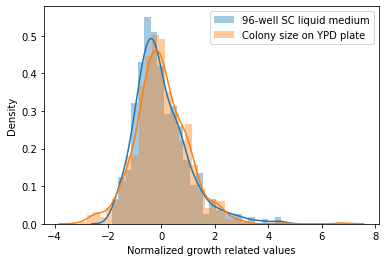

In [5]:
# normalize the experimental growth rates
df_liquid_grwoth_norm=(df_liquid_grwoth-df_liquid_grwoth.mean())/df_liquid_grwoth.std()
df_colony_grwoth_norm=(df_colony_grwoth-df_colony_grwoth.mean())/df_colony_grwoth.std()

# plot the distribution of experimental growth rates
sns.distplot(df_liquid_grwoth_norm,label='96-well SC liquid medium')
sns.distplot(df_colony_grwoth_norm,label='Colony size on YPD plate')
plt.xlabel('Normalized growth related values')
plt.legend()
plt.show()

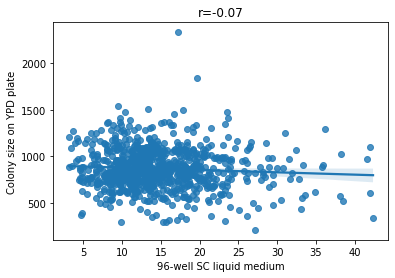

In [61]:
# check the correlation between df_liquid_grwoth and df_colony_grwoth
common_strainlist=df_liquid_grwoth.index.intersection(df_colony_grwoth.index)
df_liquid_grwoth_common=df_liquid_grwoth[common_strainlist]
df_colony_grwoth_common=df_colony_grwoth[common_strainlist]

# calculate the correlation coefficient
r=np.corrcoef(df_liquid_grwoth_common,df_colony_grwoth_common)[0,1]
# plot the correlation between df_liquid_grwoth and df_colony_grwoth
sns.regplot(x=df_liquid_grwoth_common,y=df_colony_grwoth_common)
plt.xlabel('96-well SC liquid medium')
plt.ylabel('Colony size on YPD plate')
plt.title('r='+str(round(r,2)))
plt.show()

### 1.plot to check the correlationship between predicted grwoth rate with df_liquid_grwoth

d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


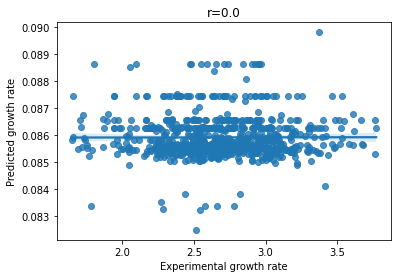

In [62]:
# log transform the experimental growth rates
df_liquid_growth_log=df_liquid_grwoth.apply(lambda x:np.log(x+1))
# plot the correlation between df_liquid_growth and df_pred_growth, and calculate the correlation coefficient
common_strainlist=df_liquid_growth_log.index.intersection(df_pred_growth.index)
df_liquid_grwoth=df_liquid_growth_log[common_strainlist]
df_pred_growth=df_pred_growth[common_strainlist]
# calculate the correlation coefficient
r=np.corrcoef(df_liquid_grwoth,df_pred_growth)[0,1]
sns.regplot(df_liquid_grwoth,df_pred_growth)
plt.xlabel('Experimental growth rate')
plt.ylabel('Predicted growth rate')
plt.title('r='+str(round(r,2)))
plt.show()


d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


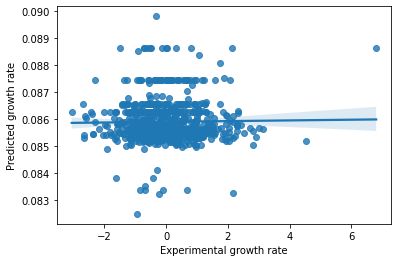

The correlation coefficient between experimental growth rate and predicted growth rate is:  0.016933613875005134


In [63]:
# plot the correlation between df_colony_grwoth and df_pred_growth, and calculate the correlation coefficient
common_strainlist=df_colony_grwoth_norm.index.intersection(df_pred_growth.index)
df_colony_grwoth=df_colony_grwoth_norm[common_strainlist]
df_pred_growth=df_pred_growth[common_strainlist]
sns.regplot(df_colony_grwoth,df_pred_growth)
plt.xlabel('Experimental growth rate')
plt.ylabel('Predicted growth rate')
plt.show()

# calculate the correlation coefficient
print('The correlation coefficient between experimental growth rate and predicted growth rate is: ',np.corrcoef(df_colony_grwoth,df_pred_growth)[0,1])